### Final Project Submission
Please fill out:

- Student name: Rose Syomiti Muthini
- Student pace: self paced / part time / full time
- Scheduled project review date/time: 29/04/2025
- Instructor name: Samuel Mwangi
- Blog post URL:

### Business understanding
##### This project aims to support a company looking to expand in the aircraft industry by identifying low risk aircraft model based on historical accident data.
##### The stakeholders who could use the project include:
- Head of aviation division, help in deciding which aircraft to invest in.
- Procurement team, help in informing on aircraft acquisition.
- Risk management team, help to evaluate safety.
##### By identifying the aircraft with the lowest injury rates and accident severity,the analysis help stakeholders make data driven decisions to ensure safety and profits.

In [1]:
import pandas as pd
import numpy as np

In [3]:
#data=pd.read_csv("AviationData.csv")
data=pd.read_csv("AviationData.csv",encoding='latin1',low_memory=False)
data.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [5]:
pd.set_option("display.max_columns",None) # This is to have all columns displayed, for better understanding of the data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [9]:
data2=pd.read_csv("USState_Codes.csv")
data2.head(2)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK


### Data Understanding
##### Data Source
The dataset used in this project was obtained from the National Transportation Safety Board (NTSB).
It includes records of civil aviation accidents and selected incidents from 1962 to 2023.
This source provides rich historical data about aircraft incidents in the U.S. and international waters.
##### Data Overview
- Total Records: 88,889 incidents
- Features: 31 columns including aircraft make/model, number of engines, damage level, injury severity, weather conditions, and flight phase.
##### Key features used
- Make/Model - this shows aircraft manufacturer/model and helps in identifying specific aircraft.
- Injury.severity - this shows severity of the incident and helps in measuring risks
- Aicraft.damage - This classifies damage and helps to measure operational risk.
- Total.fatal.injuries/Total.serious.injuries - this is the extent of injuries and calculates the overall accident risks.
##### Data Limitations
- Missing Values: Some fields (like latitude, engine type) have substantial missing values.
  



### Data Preparation
##### To prepare the data, the following steps have been taken:
- Filter the data to include only accident cases since the interest is on only actual accidet and not incidents or investigations to evaluate aircraft risks.
- Using the purpose.of.flight, focus on commercial/private aircraft to exclude military or irrelevant uses by keeping only commonly used private or commercial purposes.
- Create a new column, Total.injury to represent the total number of injuries per incident.
- Remove incomplete records that do not specify aircraft make/model as they can't be reliably used in risk analysis.
- Convert date fields to datetime format to allow to explore trends over time or filter by year.


In [11]:
original_data=data.copy() # creating a copy of original data before starting the data preparation
original_data.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [13]:
# Filter only accidents (not incidents)
data=data[data["Investigation.Type"]=="Accident"]
data.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [15]:
unique_purpose=data["Purpose.of.flight"].unique()
unique_purpose

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [17]:
# Filter by Purpose of Flight - keeping Commercial and Private
data=data[data["Purpose.of.flight"].isin(["personal","business","Instructional","Executive/corporate","Aerial Application",
     "Other Work Use","Aerial Observation","Public Aircraft - Federal","Public Aircraft - Local","Public Aircraft - State"])]
data.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,Non-Fatal,Substantial,Airplane,N68812,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,02-01-1983
45,20020917X02423,Accident,MKC82DA016,1982-01-06,"ROLLA, MO",United States,NaN,NaN,K07,DOWNTOWN,Non-Fatal,Substantial,Airplane,N2672A,Cessna,340,Yes,2.0,Reciprocating,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,06-01-1983


In [126]:
# Create a new column "Total Injuries" , to sum up the various(3) injury levels.
#first,fill NA with 0 before summing to avoid NaNs in the total
data[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]]=\
(data[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].fillna(0))
data["Total.injuries"]=data[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].sum(axis=1)
data.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.injuries,Year
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,Non-Fatal,Substantial,Airplane,N68812,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,02-01-1983,0.0,1982
45,20020917X02423,Accident,MKC82DA016,1982-01-06,"ROLLA, MO",United States,NaN,NaN,K07,DOWNTOWN,Non-Fatal,Substantial,Airplane,N2672A,Cessna,340,Yes,2.0,Reciprocating,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,06-01-1983,0.0,1982
48,20020917X01777,Accident,CHI82DA021,1982-01-06,"PAXTON, IL",United States,NaN,NaN,1C1,PAXTON MUNICIPAL,Non-Fatal,Substantial,Airplane,N4900L,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,06-01-1983,0.0,1982
57,20020917X02484,Accident,NYC82DA019,1982-01-08,"CUTCHOGUE, NY",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N46681,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,08-01-1983,0.0,1982
58,20020917X02431,Accident,MKC82DA026,1982-01-08,"LIBERTY, MO",United States,NaN,NaN,NaN,MITHELL,Non-Fatal,Substantial,Airplane,N7618P,Piper,PA-24-250,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,08-01-1983,0.0,1982


In [21]:
# Drop rows missing critical fields
data = data.dropna(subset=['Make', 'Model'])
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.injuries
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,Non-Fatal,Substantial,Airplane,N68812,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,02-01-1983,0.0
45,20020917X02423,Accident,MKC82DA016,1982-01-06,"ROLLA, MO",United States,NaN,NaN,K07,DOWNTOWN,Non-Fatal,Substantial,Airplane,N2672A,Cessna,340,Yes,2.0,Reciprocating,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,06-01-1983,0.0
48,20020917X01777,Accident,CHI82DA021,1982-01-06,"PAXTON, IL",United States,NaN,NaN,1C1,PAXTON MUNICIPAL,Non-Fatal,Substantial,Airplane,N4900L,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,06-01-1983,0.0
57,20020917X02484,Accident,NYC82DA019,1982-01-08,"CUTCHOGUE, NY",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N46681,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,08-01-1983,0.0
58,20020917X02431,Accident,MKC82DA026,1982-01-08,"LIBERTY, MO",United States,NaN,NaN,NaN,MITHELL,Non-Fatal,Substantial,Airplane,N7618P,Piper,PA-24-250,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,08-01-1983,0.0


In [23]:
# Convert dates for time based analysis
data['Event.Date'] = pd.to_datetime(data['Event.Date'])
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.injuries
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,Non-Fatal,Substantial,Airplane,N68812,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,02-01-1983,0.0
45,20020917X02423,Accident,MKC82DA016,1982-01-06,"ROLLA, MO",United States,NaN,NaN,K07,DOWNTOWN,Non-Fatal,Substantial,Airplane,N2672A,Cessna,340,Yes,2.0,Reciprocating,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,06-01-1983,0.0
48,20020917X01777,Accident,CHI82DA021,1982-01-06,"PAXTON, IL",United States,NaN,NaN,1C1,PAXTON MUNICIPAL,Non-Fatal,Substantial,Airplane,N4900L,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,06-01-1983,0.0
57,20020917X02484,Accident,NYC82DA019,1982-01-08,"CUTCHOGUE, NY",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N46681,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,08-01-1983,0.0
58,20020917X02431,Accident,MKC82DA026,1982-01-08,"LIBERTY, MO",United States,NaN,NaN,NaN,MITHELL,Non-Fatal,Substantial,Airplane,N7618P,Piper,PA-24-250,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,08-01-1983,0.0


### Data Analysis
After preparing the dataset,series of analyses is conducted to uncover patterns in aircraft accidents. These insights are aimed at identifying the safest aircraft for commercial or private use and reducing operational risk.

#### Analysis  : Injury Rates by Aircraft Model

In [114]:
aircraft_risk = data.groupby(["Make", "Model"]).agg(
    Total_injuries_sum=("Total.injuries", "sum"),
    Total_injuries_mean=("Total.injuries", "mean"),
    Total_injuries_count=("Total.injuries", "count")
).reset_index()
aircraft_risk 

,Make,Model,Total_injuries_sum,Total_injuries_mean,Total_injuries_count
0,AERMACCHI,IMPALA MB-326M,2.0,2.000000,1
1,AERO AT SP ZOO,AT-4 LSA,1.0,1.000000,1
2,AERO COMMANDER,100,0.0,0.000000,1
3,AERO COMMANDER,112,0.0,0.000000,1
4,AERO COMMANDER,500 S,2.0,0.666667,3
...,...,...,...,...,...
3748,Wsk-pzl Mielic,M-18A,1.0,1.000000,1
3749,ZENAIR,CH2T,0.0,0.000000,1
3750,ZENAIR LTD,CH 2000,3.0,1.000000,3
3751,Zenair,CH 2000,0.0,0.000000,3


In [30]:
# Filter to aircraft models with a meaningful sample size
aircraft_risk = aircraft_risk[aircraft_risk['Total.injuries', "count"] >= 10]
aircraft_risk

,Make,Model,Total_injuries_sum,Total_injuries_mean,Total_injuries_count
7,AERO COMMANDER,S2R,7.0,0.500000,14
14,AERONCA,7AC,9.0,0.750000,12
73,AIR TRACTOR INC,AT 502,5.0,0.384615,13
74,AIR TRACTOR INC,AT 502B,11.0,0.611111,18
75,AIR TRACTOR INC,AT 602,7.0,0.700000,10
...,...,...,...,...,...
3716,Weatherly,201C,4.0,0.266667,15
3717,Weatherly,620,3.0,0.272727,11
3720,Weatherly,620B,8.0,0.470588,17
3736,Wsk Pzl Mielec,M-18A,8.0,0.380952,21


In [32]:
# Sort by safest (lowest avg injuries)
aircraft_risk = aircraft_risk.sort_values(by=('Total_injuries_mean'), ascending=True)
aircraft_risk.head(10)

,Make,Model,Total_injuries_sum,Total_injuries_mean,Total_injuries_count
2158,Grumman,G164B,1.0,0.055556,18
330,Air Tractor,AT 602,1.0,0.090909,11
1918,Enstrom,F-28A,1.0,0.100000,10
463,Ayres,S2R-G6,1.0,0.100000,10
3004,Piper,PA-30,2.0,0.125000,16
755,Beech,B19,2.0,0.133333,15
459,Ayres,S2R-600,2.0,0.133333,15
2938,Piper,PA-22-150,3.0,0.142857,21
2791,PIPER,PA-28R-200,2.0,0.153846,13
2304,Hiller,UH-12D,2.0,0.166667,12


### Visualizations
To support the findings and recommendations, Targeted visualizations were created. These visuals offer both high-level insights and detailed comparisons that help stakeholders quickly identify low-risk aircraft based on real accident data.

#### Average Injuries per Aircraft Model (Top 10 Low-Risk)
This bar chart displays the top 10 aircraft models with the lowest average injuries per accident, based on models with at least 10 recorded accidents. It helps identify the safest aircraft using a combination of:
- Mean injury rates.
- Accident counts.
- Color gradients.

### Visualization 1 – Top 10 Safest Aircraft Models

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

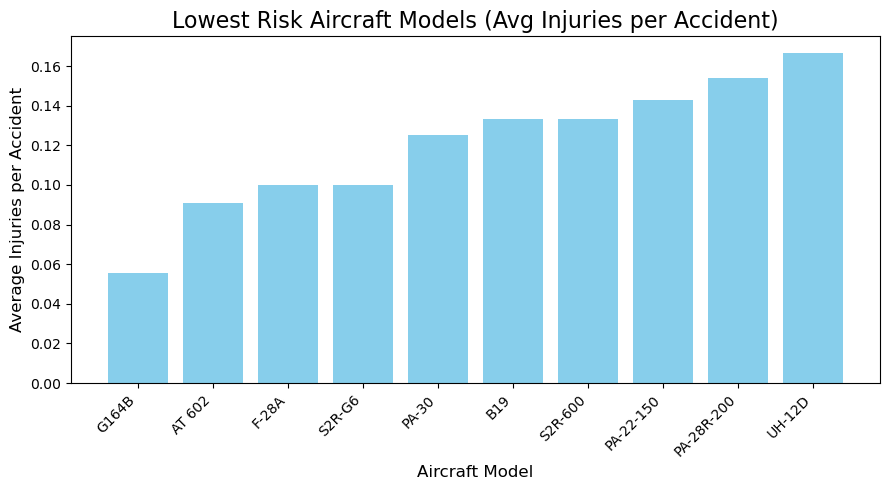

In [95]:
# Create bar chart
top_models = aircraft_risk.head(10)

plt.figure(figsize=(9, 5))
plt.bar(top_models["Model"], top_models["Total_injuries_mean"], color='skyblue')
plt.title("Lowest Risk Aircraft Models (Avg Injuries per Accident)", fontsize=16)
plt.xlabel("Aircraft Model", fontsize=12)
plt.ylabel("Average Injuries per Accident", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Recommendation Based on the Top 10 Safest Aircraft Models :
with the above analysis, the Grumman G164B appears to be the safest and most reliable model based on the following criteria:
- Lowest average injuries per accident (0.0556).
- A decent number of accidents (18) for statistical reliability.
- It strikes a good balance between safety and data confidence.
 And for second option, I would consider Air Tractor AT 602.

### Visualization 2 – Total Injuries vs. Accident Count

In [124]:
reliable_models= aircraft_risk[aircraft_risk['Total_injuries_count'] >= 10].head(10)
reliable_models

,Make,Model,Total_injuries_sum,Total_injuries_mean,Total_injuries_count
7,AERO COMMANDER,S2R,7.0,0.500000,14
14,AERONCA,7AC,9.0,0.750000,12
73,AIR TRACTOR INC,AT 502,5.0,0.384615,13
74,AIR TRACTOR INC,AT 502B,11.0,0.611111,18
75,AIR TRACTOR INC,AT 602,7.0,0.700000,10
78,AIR TRACTOR INC,AT-301,8.0,0.320000,25
86,AIR TRACTOR INC,AT-502,5.0,0.454545,11
88,AIR TRACTOR INC,AT-502B,8.0,0.320000,25
89,AIR TRACTOR INC,AT-602,11.0,0.500000,22
91,AIR TRACTOR INC,AT-802A,11.0,1.000000,11


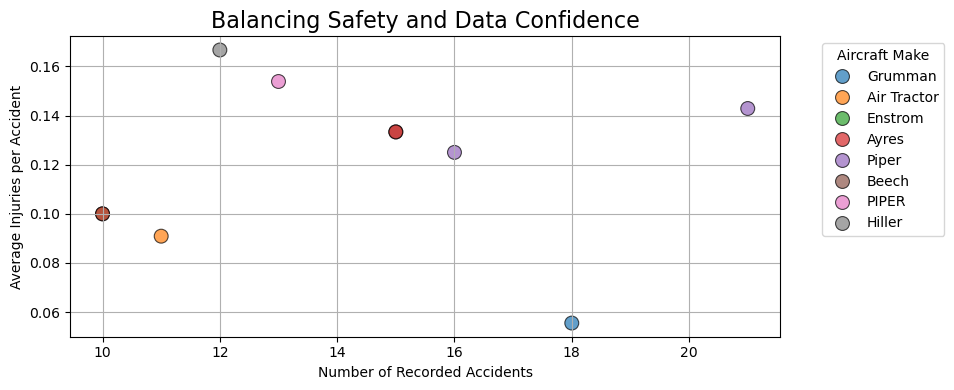

In [87]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=reliable_models,
    x='Total_injuries_count',
    y='Total_injuries_mean',
    hue='Make',  # Optional, helps separate similar models
    s=100,
    alpha=0.7,
    edgecolor='black'
)
plt.title('Balancing Safety and Data Confidence', fontsize=16)
plt.xlabel('Number of Recorded Accidents')
plt.ylabel('Average Injuries per Accident')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Aircraft Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Recommendation based on Total Injuries vs. Accident Count:
#### Grumman G164B appears in the bottom-right quadrant and this means:
- Low average injuries per accident
- Relatively high number of incidents (18) – enough for statistical confidence
#### The aircraft offers the best balance of safety (low injuries) and data reliability (18 accidents), outperforming others.




### Visualization 3 – Injury Trend Over Time

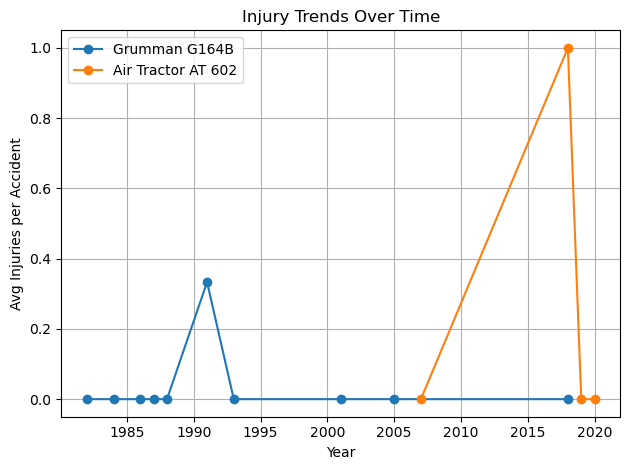

In [130]:
# Extract year
data['Year'] = data['Event.Date'].dt.year

# Choose top models
top_models = [('Grumman', 'G164B'), ('Air Tractor', 'AT 602')]

# Filter relevant data
filtered = data[data[['Make', 'Model']].apply(tuple, axis=1).isin(top_models)]

# Group by year and model
trend = filtered.groupby(['Year', 'Make', 'Model'])['Total.injuries'].mean().reset_index()


# Plot
import matplotlib.pyplot as plt

for make, model in top_models:
    df_plot = trend[(trend['Make'] == make) & (trend['Model'] == model)]
    plt.plot(df_plot['Year'], df_plot['Total.injuries'], label=f"{make} {model}", marker='o')

plt.title("Injury Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Injuries per Accident")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Recommendation based on Injury Trend Over Time:
- Models like Grumman G164B shows flat or consistently low injury averages over decades.

- Flat or declining lines for models like Grumman G164B suggests consistent safety.

- This supports long-term operational safety—ideal for a company planning multi-year investment.



In [132]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.injuries,Year
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,Non-Fatal,Substantial,Airplane,N68812,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,02-01-1983,0.0,1982
45,20020917X02423,Accident,MKC82DA016,1982-01-06,"ROLLA, MO",United States,NaN,NaN,K07,DOWNTOWN,Non-Fatal,Substantial,Airplane,N2672A,Cessna,340,Yes,2.0,Reciprocating,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,06-01-1983,0.0,1982
48,20020917X01777,Accident,CHI82DA021,1982-01-06,"PAXTON, IL",United States,NaN,NaN,1C1,PAXTON MUNICIPAL,Non-Fatal,Substantial,Airplane,N4900L,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,06-01-1983,0.0,1982
57,20020917X02484,Accident,NYC82DA019,1982-01-08,"CUTCHOGUE, NY",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N46681,Cessna,152,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,08-01-1983,0.0,1982
58,20020917X02431,Accident,MKC82DA026,1982-01-08,"LIBERTY, MO",United States,NaN,NaN,NaN,MITHELL,Non-Fatal,Substantial,Airplane,N7618P,Piper,PA-24-250,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,08-01-1983,0.0,1982


In [120]:
trend

,Year,Make,Model,Total.injuries
0,1982,Grumman,G164B,0.000000
1,1984,Grumman,G164B,0.000000
2,1986,Grumman,G164B,0.000000
3,1987,Grumman,G164B,0.000000
4,1988,Grumman,G164B,0.000000
5,1991,Grumman,G164B,0.333333
6,1993,Grumman,G164B,0.000000
7,2001,Grumman,G164B,0.000000
8,2005,Grumman,G164B,0.000000
9,2007,Air Tractor,AT 602,0.000000


In [108]:
!pip install openpyxl

In [118]:
#Exporting results to Excel
myfolder = r"C:\Users\HomePC\Desktop\MORINGA PYTHON FOLDER\PHASE 1 PROJECT"
myfile = "Aircraftrisktrend.xlsx"
mypath = f"{myfolder}\\{myfile}"

# Save to Excel
trend.to_excel(mypath, index=False)